#### ***implement k-mean algorithm by Numpy***

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

In [2]:
points = np.vstack(((np.random.randn(150, 2) * 0.75 + np.array([1, 0])),
                  (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])),
                  (np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5]))))

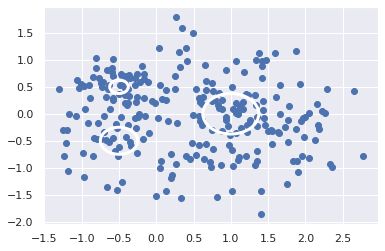

In [3]:
# plot the dataset as well as the cluster centers
plt.scatter(points[:, 0], points[:, 1])
ax = plt.gca()
ax.add_artist(plt.Circle(np.array([1, 0]), 0.75/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, 0.5]), 0.25/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, -0.5]), 0.5/2, fill=False, lw=3))

In [4]:
# function to initializes k centroids by randomly selecting them from the data points
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

initialize_centroids(points, 3)

array([[ 1.55644401, -0.3139311 ],
       [ 1.21719871, -0.34350971],
       [-0.83442998, -0.4442446 ]])

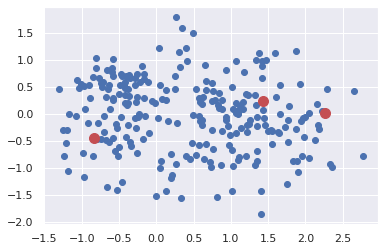

In [5]:
# represent the results using a plot
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

In [6]:
# function that returns the closest centroid for each point
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

c = initialize_centroids(points, 3)
closest_centroid(points, c)

array([2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1,
       2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
# the last step in the algorithm is to move the centroids to the mean location associated with it
def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

move_centroids(points, closest_centroid(points, c), c)

array([[-0.43276203,  0.41383874],
       [-0.04327495, -0.84439091],
       [ 1.29981587,  0.06491132]])

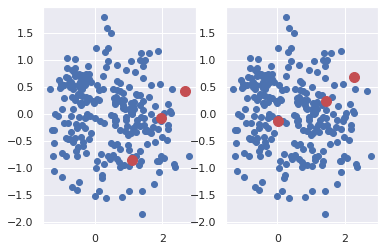

In [8]:
# visualize these first two steps
plt.subplot(121)
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

plt.subplot(122)
plt.scatter(points[:, 0], points[:, 1])
closest = closest_centroid(points, centroids)
centroids = move_centroids(points, closest, centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)